In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

In [32]:
df=pd.read_csv('fraudTrain.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [33]:
df.shape

(1296675, 23)

In [34]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [35]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [36]:
df.info

<bound method DataFrame.info of          Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutman

In [37]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [38]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [39]:
df.duplicated().sum()

0

In [41]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,amt,first,last,street,city,zip,...,job_Visual merchandiser,job_Volunteer coordinator,job_Warden/ranger,job_Warehouse manager,job_Waste management officer,job_Water engineer,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,Jennifer,Banks,561 Perry Cove,Moravian Falls,28654,...,False,False,False,False,False,False,False,False,False,False
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,Stephanie,Gill,43039 Riley Greens Suite 393,Orient,99160,...,False,False,False,False,False,False,False,False,False,False


In [42]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
label_encoder = LabelEncoder()

In [46]:
df['trans_date_trans_time'] = label_encoder.fit_transform(df['trans_date_trans_time'])

In [47]:
df['merchant'] = label_encoder.fit_transform(df['merchant'])

In [57]:
df['first'] = label_encoder.fit_transform(df['first'])

In [58]:
df['last'] = label_encoder.fit_transform(df['last'])

In [59]:
df['street'] = label_encoder.fit_transform(df['street'])

In [60]:
df['city'] = label_encoder.fit_transform(df['city'])

In [61]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,amt,first,last,street,city,zip,...,job_Volunteer coordinator,job_Warden/ranger,job_Warehouse manager,job_Waste management officer,job_Water engineer,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer,distance
0,0,0,2703186189652095,514,4.97,162,18,568,526,28654,...,False,False,False,False,False,False,False,False,False,48.947783
1,1,1,630423337322,241,107.23,309,157,435,612,99160,...,False,False,False,False,False,False,False,False,False,18.775736


In [49]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split

X = df.drop(['is_fraud', 'trans_date_trans_time', 'trans_num', 'first', 'last', 'street', 'city', 'zip', 'dob'], axis=1)
y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
X.shape

(1296675, 572)

In [55]:
y.shape

(1296675,)

In [ ]:
# Remove unwanted characters or symbols (e.g., :::)
df[''] = df['genre'].str.replace(':::', '')
df['plotsummary'] = df['plotsummary'].str.replace(':::', '')

In [88]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,amt,first,last,street,city,zip,...,job_Volunteer coordinator,job_Warden/ranger,job_Warehouse manager,job_Waste management officer,job_Water engineer,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer,distance
0,0,0,2703186189652095,514,4.97,162,18,568,526,28654,...,False,False,False,False,False,False,False,False,False,48.947783
1,1,1,630423337322,241,107.23,309,157,435,612,99160,...,False,False,False,False,False,False,False,False,False,18.775736


In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
lr=LogisticRegression()

In [67]:
lr= LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_prob_lr = lr.predict_proba(X_test)[:, 1]

In [69]:
print("Logistic Regression Evaluation:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_pred_prob_lr))

Logistic Regression Evaluation:
Confusion Matrix:
[[257815      0]
 [  1520      0]]

Classification Report:


C:\Users\bossh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.00      0.00      0.00      1520

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335


ROC AUC Score:
0.5089921284335872


C:\Users\bossh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bossh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [70]:
lr.score(X_test,y_test)

0.9941388551487458

In [66]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [119]:
model.score(X_test,y_test)

0.9974396051439258

In [68]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.93      0.61      0.74      1520

    accuracy                           1.00    259335
   macro avg       0.96      0.81      0.87    259335
weighted avg       1.00      1.00      1.00    259335

ROC AUC Score: 0.8061045468650001


In [93]:
pip install matplotlib

     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ------- ------------------------------- 30.7/165.5 kB 1.4 MB/s eta 0:00:01
     -------------------------------------  163.8/165.5 kB 2.5 MB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB 5.2 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/8.0 MB 6.1 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/8.0 MB 6.3 MB/s eta 0:00:02
   ------ --------------------------------- 1.4/8.0 MB 7.2 MB/s eta 0:00:01
   -------- ------------------------------- 1.8/8.0 MB 7.5 MB/s eta 0:00:01
   ----------- ---------------------------- 2.3/8.0 MB 7.6 MB/s eta 0:00:01
   ------------- -------------------------- 2.7/8.0 MB 8.3 MB/s eta 0:00:01
   --------------- ------------------------ 3.2/8.0 MB 8.4 MB/s eta 0:00:01
   -------

In [95]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 653.6 kB/s eta 0:00:01
   -------------------------- ------------- 194.6/294.9 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [107]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,amt,first,last,street,city,zip,...,job_Volunteer coordinator,job_Warden/ranger,job_Warehouse manager,job_Waste management officer,job_Water engineer,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer,distance
0,0,0,2703186189652095,514,4.97,162,18,568,526,28654,...,False,False,False,False,False,False,False,False,False,48.947783
1,1,1,630423337322,241,107.23,309,157,435,612,99160,...,False,False,False,False,False,False,False,False,False,18.775736


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

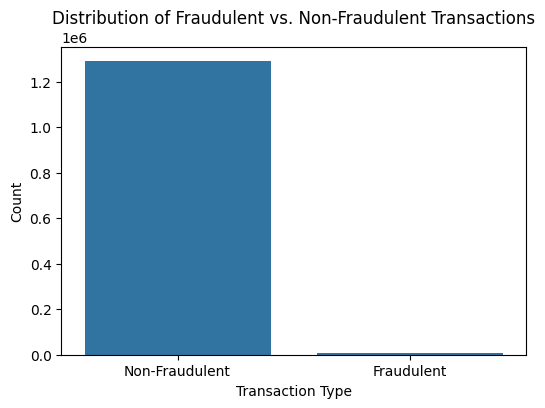

In [101]:
# Distribution of Fraudulent vs. Non-Fraudulent Transactions
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

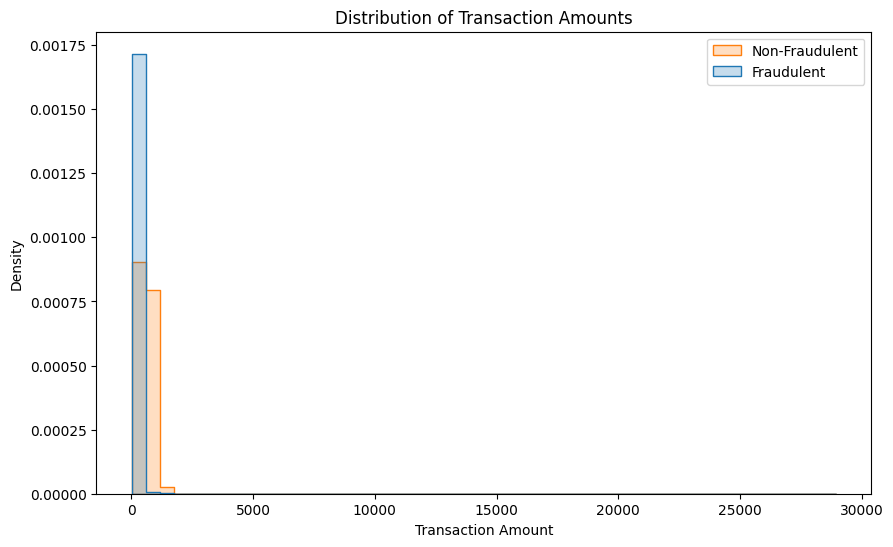

In [103]:
# Distribution of Transaction Amounts
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='amt', hue='is_fraud', element='step', stat='density', common_norm=False, bins=50)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.legend(['Non-Fraudulent', 'Fraudulent'])
plt.show()


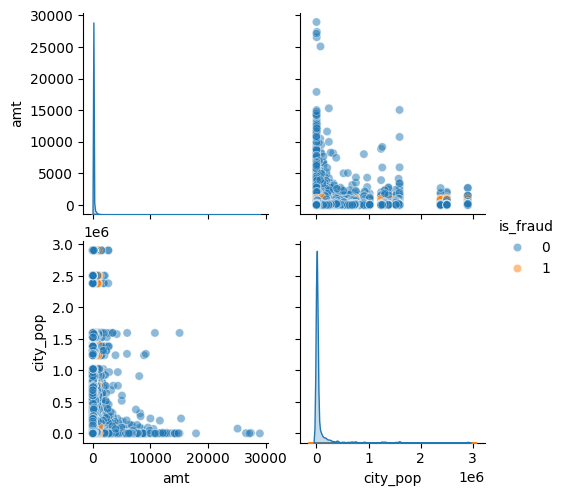

In [112]:
# Pair Plot for a subset of features
# Convert date to datetime and extract year for better visualization
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
subset = df[['amt', 'city_pop', 'is_fraud']]
sns.pairplot(subset, hue='is_fraud', plot_kws={'alpha': 0.5})

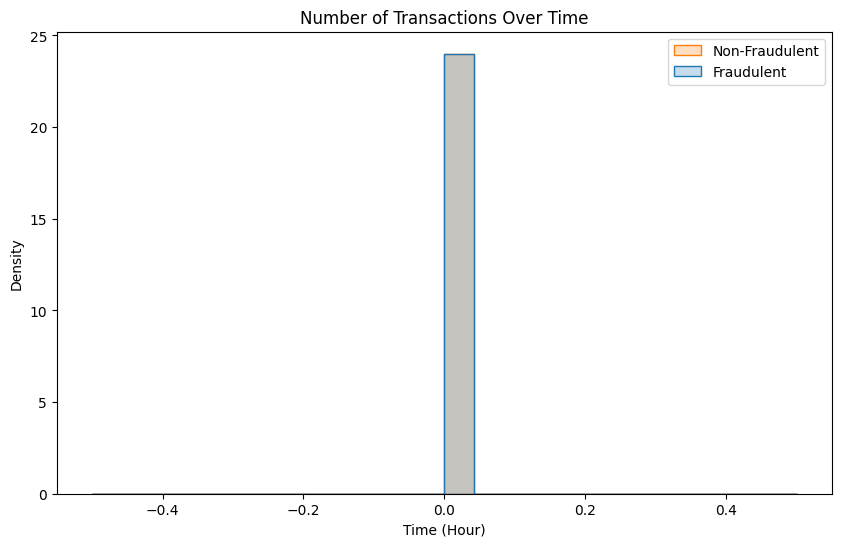

In [116]:
# Time Series Analysis
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='trans_hour', hue='is_fraud', element='step', stat='density', common_norm=False, bins=24)
plt.title('Number of Transactions Over Time')
plt.xlabel('Time (Hour)')
plt.ylabel('Density')
plt.legend(['Non-Fraudulent', 'Fraudulent'])
plt.show()
